In [1]:
from histogram_manager import HistogramManager
import atlasplots

Welcome to JupyROOT 6.14/04


In [2]:
hm = HistogramManager("/project/def-psavard/ladamek/momentumvalidationoutput/test2_Nov3/Output.root")

Initializing histogram manager on file /project/def-psavard/ladamek/momentumvalidationoutput/test2_Nov3/Output.root
Found these channels in the file ['Data', 'MC']


In [3]:
Neg_histograms = ["Neg_ID_AverageMassProfile_{}".format(i) for i in range(0, 12)]
Pos_histograms = ["Pos_ID_AverageMassProfile_{}".format(i) for i in range(0, 12)]

Applying ATLAS style settings
['__author__', '__author_email__', '__builtins__', '__cached__', '__copyright__', '__description__', '__doc__', '__file__', '__license__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__title__', '__url__', '__version__', 'api', 'atlas_label', 'atlasstyle', 'core', 'figure', 'ratio_plot', 'root', 'root_helpers', 'set_atlas_style', 'subplots']


Warning in <TCanvas::Constructor>: Deleting canvas with same name: Pos_ID_AverageMassProfile_0Neg_ID_AverageMassProfile_0Sagitta
Warning in <TCanvas::Constructor>: Deleting canvas with same name: Pos_ID_AverageMassProfile_1Neg_ID_AverageMassProfile_1Sagitta
Warning in <TCanvas::Constructor>: Deleting canvas with same name: Pos_ID_AverageMassProfile_2Neg_ID_AverageMassProfile_2Sagitta
Warning in <TCanvas::Constructor>: Deleting canvas with same name: Pos_ID_AverageMassProfile_3Neg_ID_AverageMassProfile_3Sagitta
Warning in <TCanvas::Constructor>: Deleting canvas with same name: Pos_ID_AverageMassProfile_4Neg_ID_AverageMassProfile_4Sagitta
Warning in <TCanvas::Constructor>: Deleting canvas with same name: Pos_ID_AverageMassProfile_5Neg_ID_AverageMassProfile_5Sagitta
Warning in <TCanvas::Constructor>: Deleting canvas with same name: Pos_ID_AverageMassProfile_6Neg_ID_AverageMassProfile_6Sagitta
Warning in <TCanvas::Constructor>: Deleting canvas with same name: Pos_ID_AverageMassProfile_7Neg

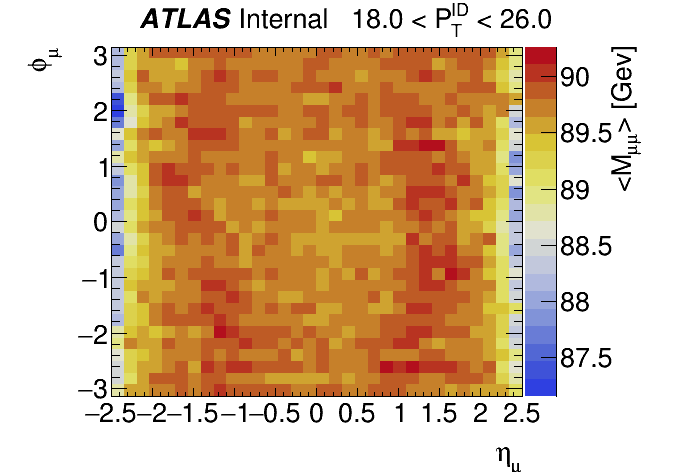

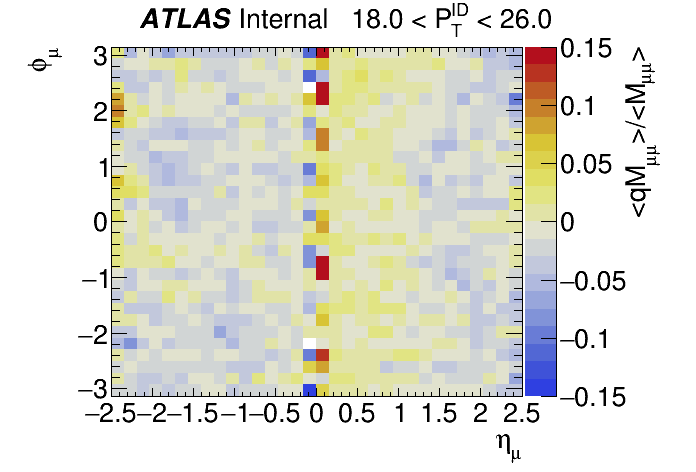

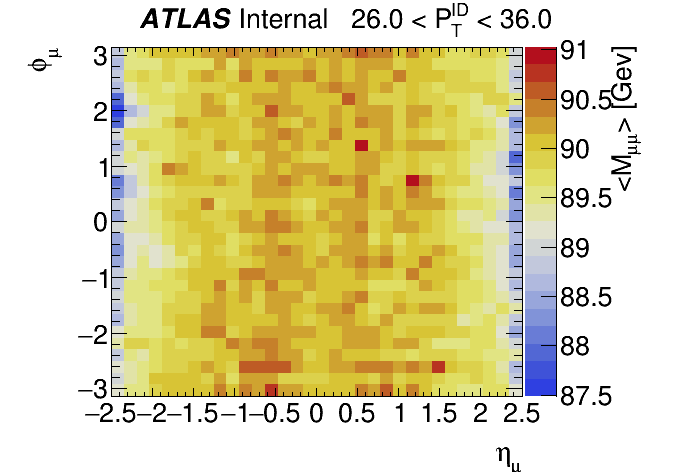

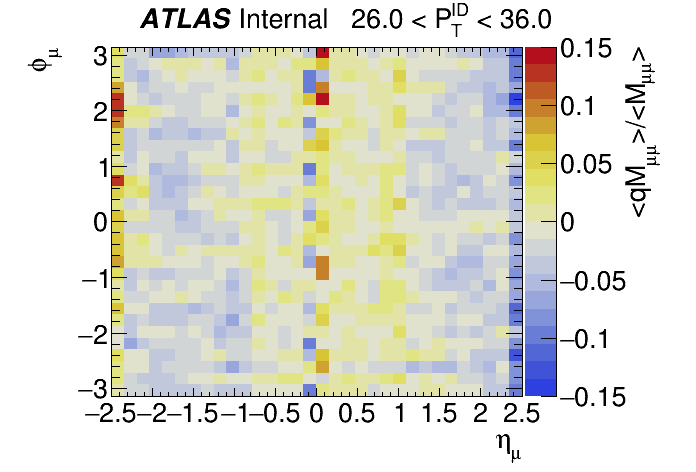

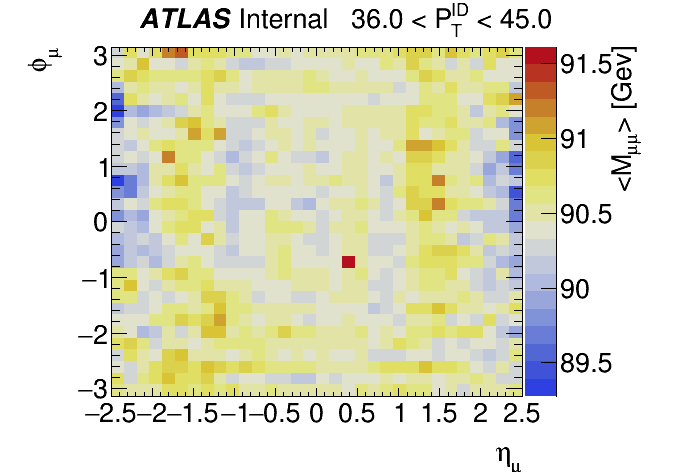

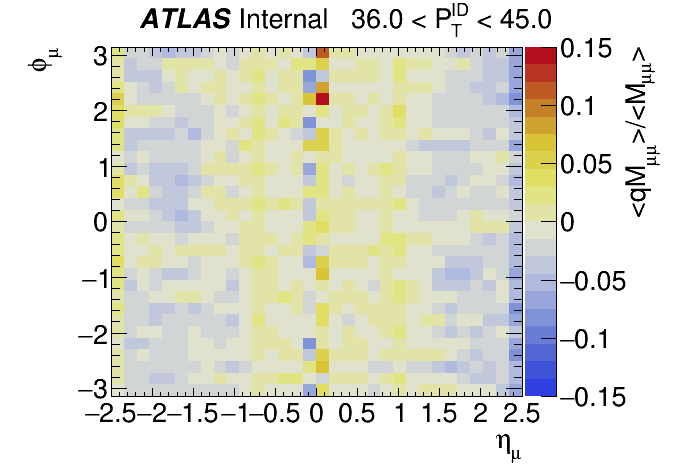

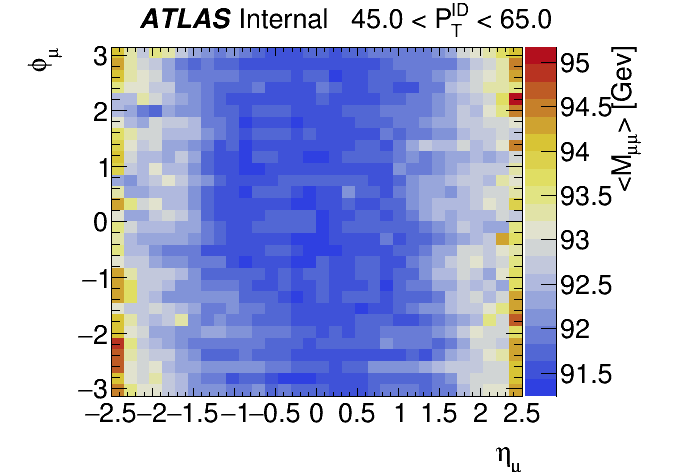

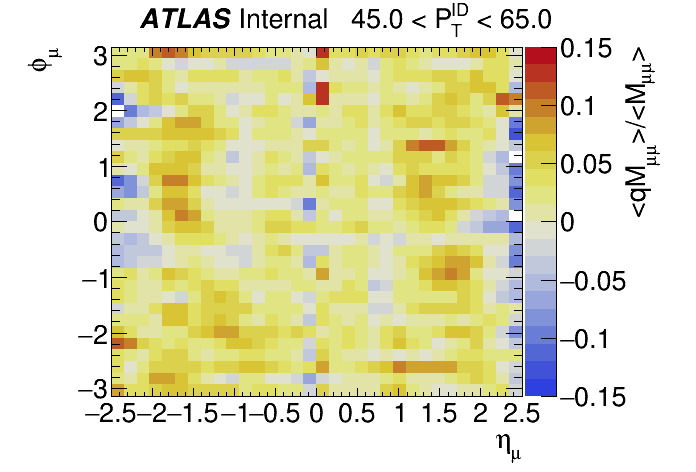

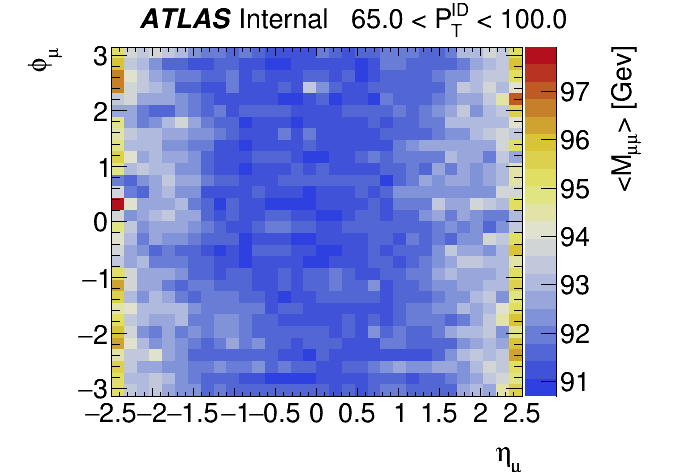

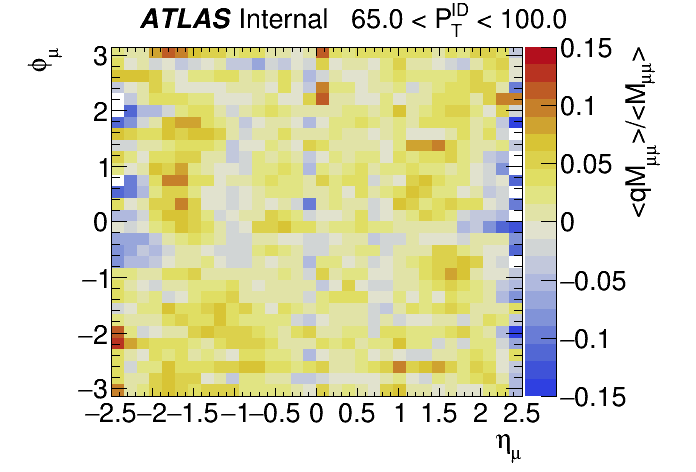

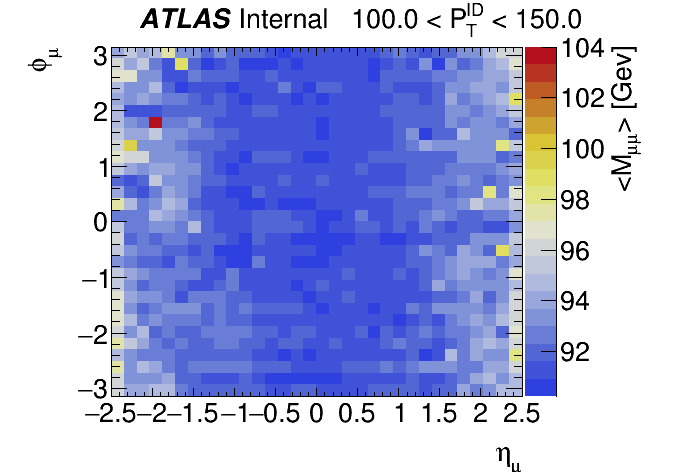

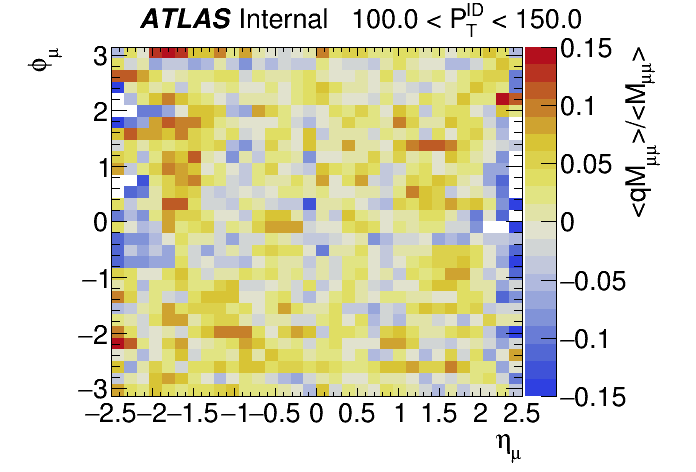

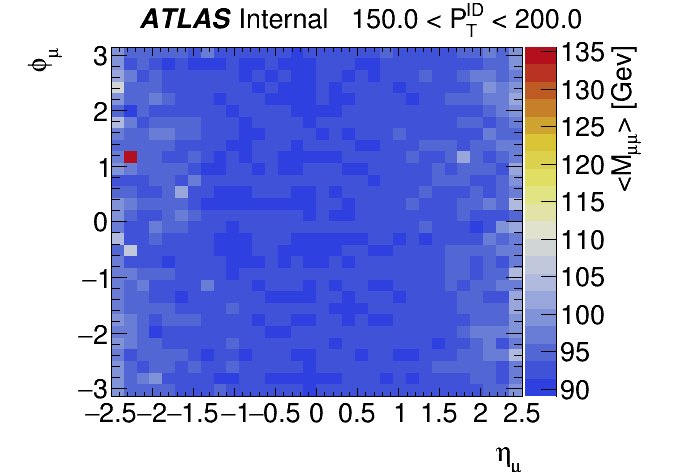

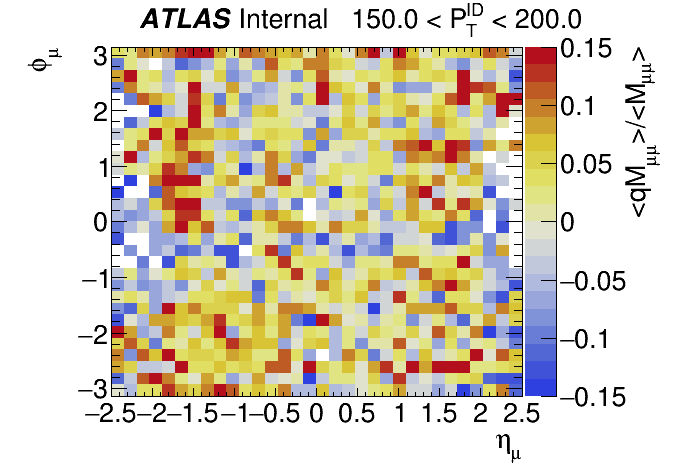

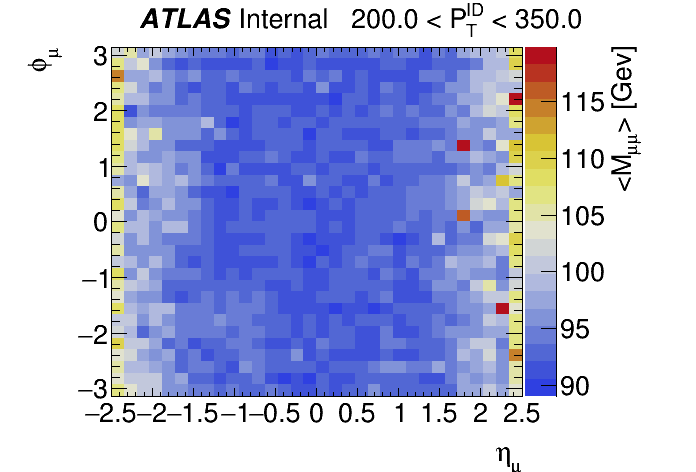

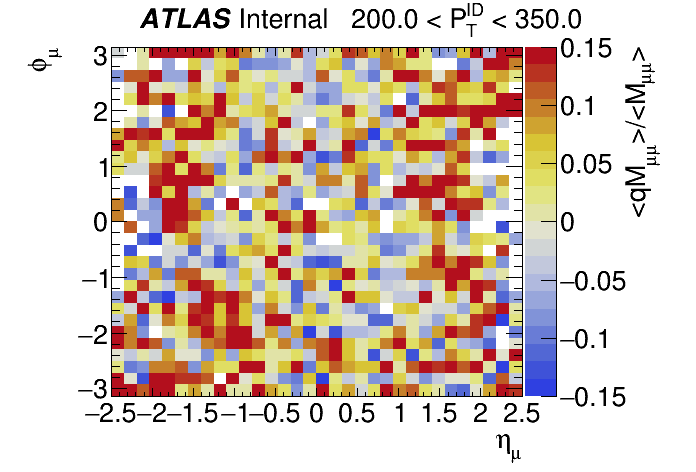

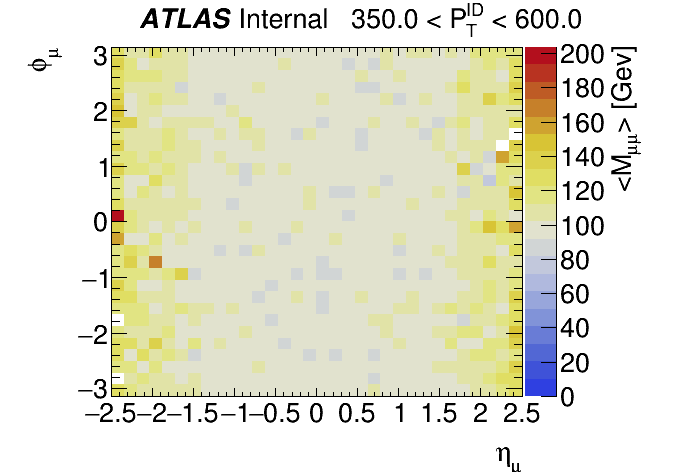

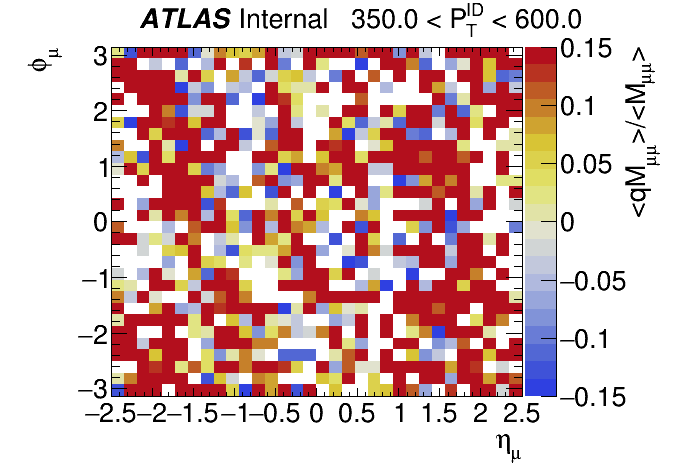

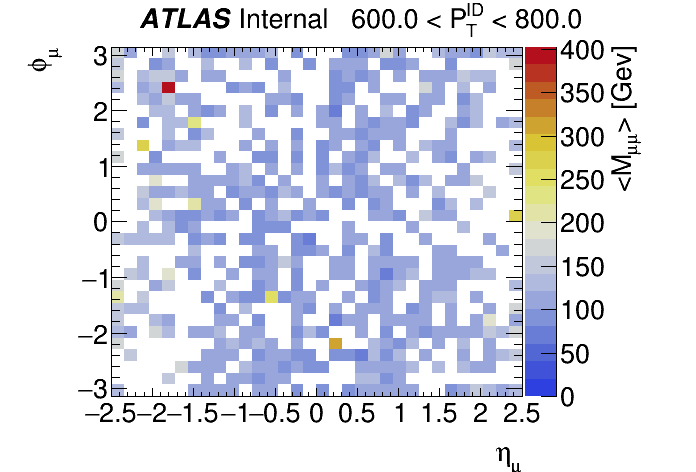

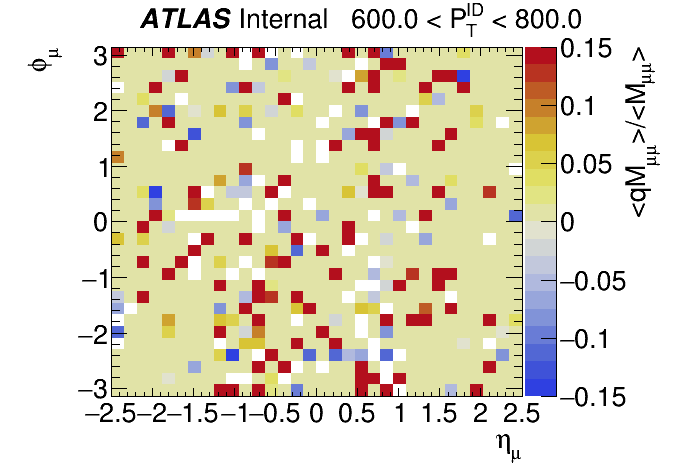

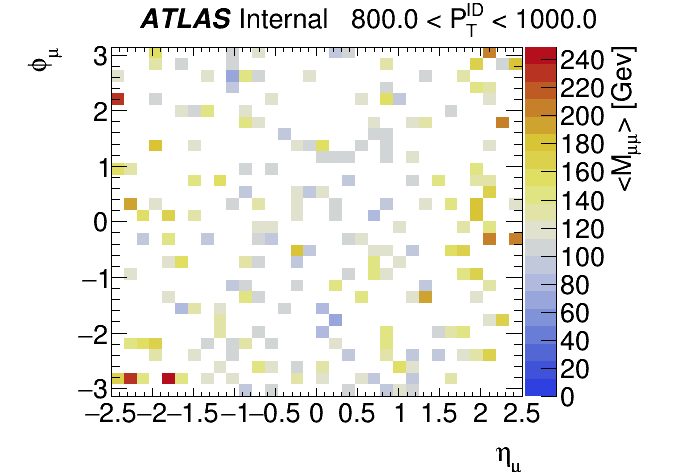

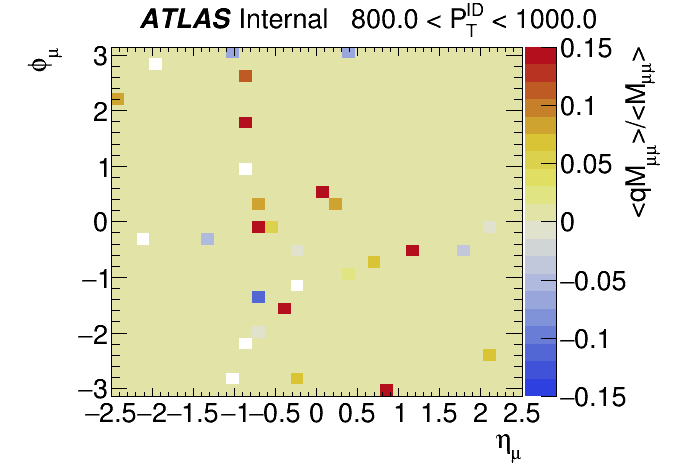

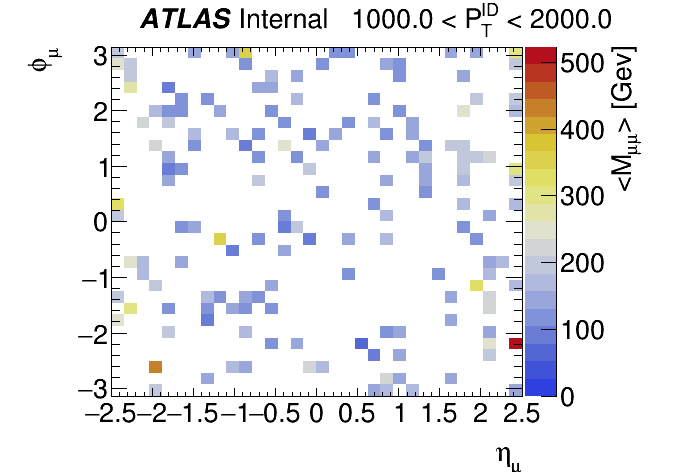

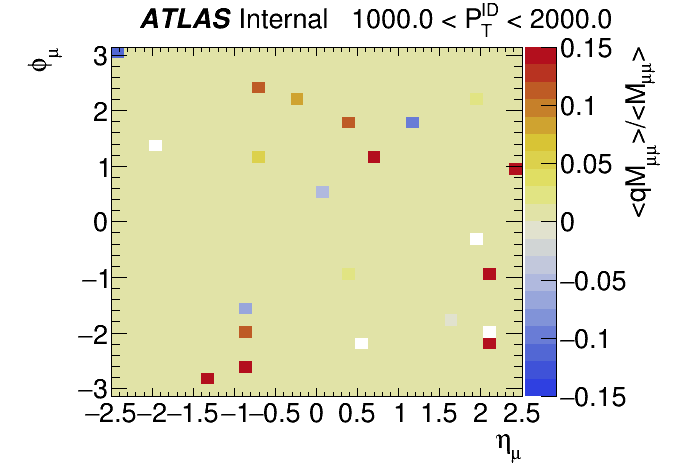

In [6]:
hist_cache = {}
canvases = []
from IterativeBiasCorrection import calculate_sagitta_bias
import ROOT
from binnings import global_pt_binning, global_pt_binning_zipped

def draw_text(x, y, text, color=ROOT.kBlack, size=0.05):
    '''Draw text.
    Parameters
    ----------
    x : float
        x position in NDC coordinates
    y : float
        y position in NDC coordinates
    text : string, optional
        The text
    color : int, optional
        Text colour (the default is 1, i.e. black).
        See https://ROOT.cern.ch/doc/master/classTColor.html.
        If you know the hex code, rgb values, etc., use ``ROOT.TColor.GetColor()``
    size : float, optional
        Text size
        See https://ROOT.cern.ch/doc/master/classTLatex.html
    '''
    l = ROOT.TLatex()
    l.SetTextSize(size)
    l.SetNDC()
    l.SetTextColor(color)
    l.DrawLatex(x, y, text)
#@title_style = ROOT.gStyle.GetOptTitle()
#print(title_style)
#from style import set_style, get_atlas_style
#astyle = get_atlas_style()
#astyle.SetOptTitle(title_style)
#set_style(astyle)
from atlasplots import set_atlas_style, atlas_label
set_atlas_style()
print(dir(atlasplots))
for Pos_histogram, Neg_histogram, binlow, binhigh in zip(Pos_histograms,\
                                                         Neg_histograms,\
                                                         global_pt_binning[:-1],\
                                                         global_pt_binning[1:]):
    description = r"{:.1f} < {} < {:.1f}".format(binlow, "P_{T}^{ID}", binhigh)
    
    
    h_pos = hm.get_histograms(Pos_histogram)
    hist_cache[Pos_histogram] = h_pos
    h_neg = hm.get_histograms(Neg_histogram)
    hist_cache[Neg_histogram] = h_neg
    canvases.append(ROOT.TCanvas(Pos_histogram + Neg_histogram))
    h_pos["Data"].Draw("COLZ")
    h_pos["Data"].GetYaxis().SetTitleOffset(0.7*h_pos["Data"].GetYaxis().GetTitleOffset())
    canvases[-1].SetTopMargin(0.1)
    atlas_label(0.2, 0.94, "Internal   {}".format(description))
    canvases[-1].SetRightMargin(0.25)
    canvases[-1].Draw()
    
    ROOT.gStyle.SetPalette(ROOT.kTemperatureMap)

    bias_hist = calculate_sagitta_bias(h_pos["Data"], h_neg["Data"])
    canvases.append(ROOT.TCanvas(Pos_histogram + Neg_histogram + "Sagitta"))
    bias_hist.Draw("COLZ")
    bias_hist.SetMinimum(-0.15)
    bias_hist.SetMaximum(0.15)
    bias_hist.SetTitle(description)
    bias_hist.GetYaxis().SetTitleOffset(0.7*bias_hist.GetYaxis().GetTitleOffset())
    bias_hist.GetXaxis().SetTitleOffset(0.8*bias_hist.GetXaxis().GetTitleOffset())
    bias_hist.GetZaxis().SetTitleOffset(1.25*bias_hist.GetZaxis().GetTitleOffset())
    hist_cache["bias_hist{}".format(bias_hist.GetName())] = bias_hist

    canvases[-1].SetTopMargin(0.1)
    canvases[-1].cd()

    atlas_label(0.2, 0.94, "Internal   {}".format(description))
    canvases[-1].SetRightMargin(0.25)
    canvases[-1].Draw()

Applying ATLAS style settings
Applying ATLAS style settings
Applying ATLAS style settings
Applying ATLAS style settings
Applying ATLAS style settings
Applying ATLAS style settings
Applying ATLAS style settings
Applying ATLAS style settings
Applying ATLAS style settings
Applying ATLAS style settings
Applying ATLAS style settings
Applying ATLAS style settings


Info in <TCanvas::Print>: pdf file plots/1__Pos_CB_Mass_Histogram_0Data Pos_CB_Mass_Histogram_0MC.pdf has been created
Info in <TCanvas::Print>: pdf file plots/2__Pos_CB_Mass_Histogram_1Data Pos_CB_Mass_Histogram_1MC.pdf has been created
Info in <TCanvas::Print>: pdf file plots/3__Pos_CB_Mass_Histogram_2Data Pos_CB_Mass_Histogram_2MC.pdf has been created
Info in <TCanvas::Print>: pdf file plots/4__Pos_CB_Mass_Histogram_3Data Pos_CB_Mass_Histogram_3MC.pdf has been created
Info in <TCanvas::Print>: pdf file plots/5__Pos_CB_Mass_Histogram_4Data Pos_CB_Mass_Histogram_4MC.pdf has been created
Info in <TCanvas::Print>: pdf file plots/6__Pos_CB_Mass_Histogram_5Data Pos_CB_Mass_Histogram_5MC.pdf has been created
Info in <TCanvas::Print>: pdf file plots/7__Pos_CB_Mass_Histogram_6Data Pos_CB_Mass_Histogram_6MC.pdf has been created
Info in <TCanvas::Print>: pdf file plots/8__Pos_CB_Mass_Histogram_7Data Pos_CB_Mass_Histogram_7MC.pdf has been created
Info in <TCanvas::Print>: pdf file plots/9__Pos_

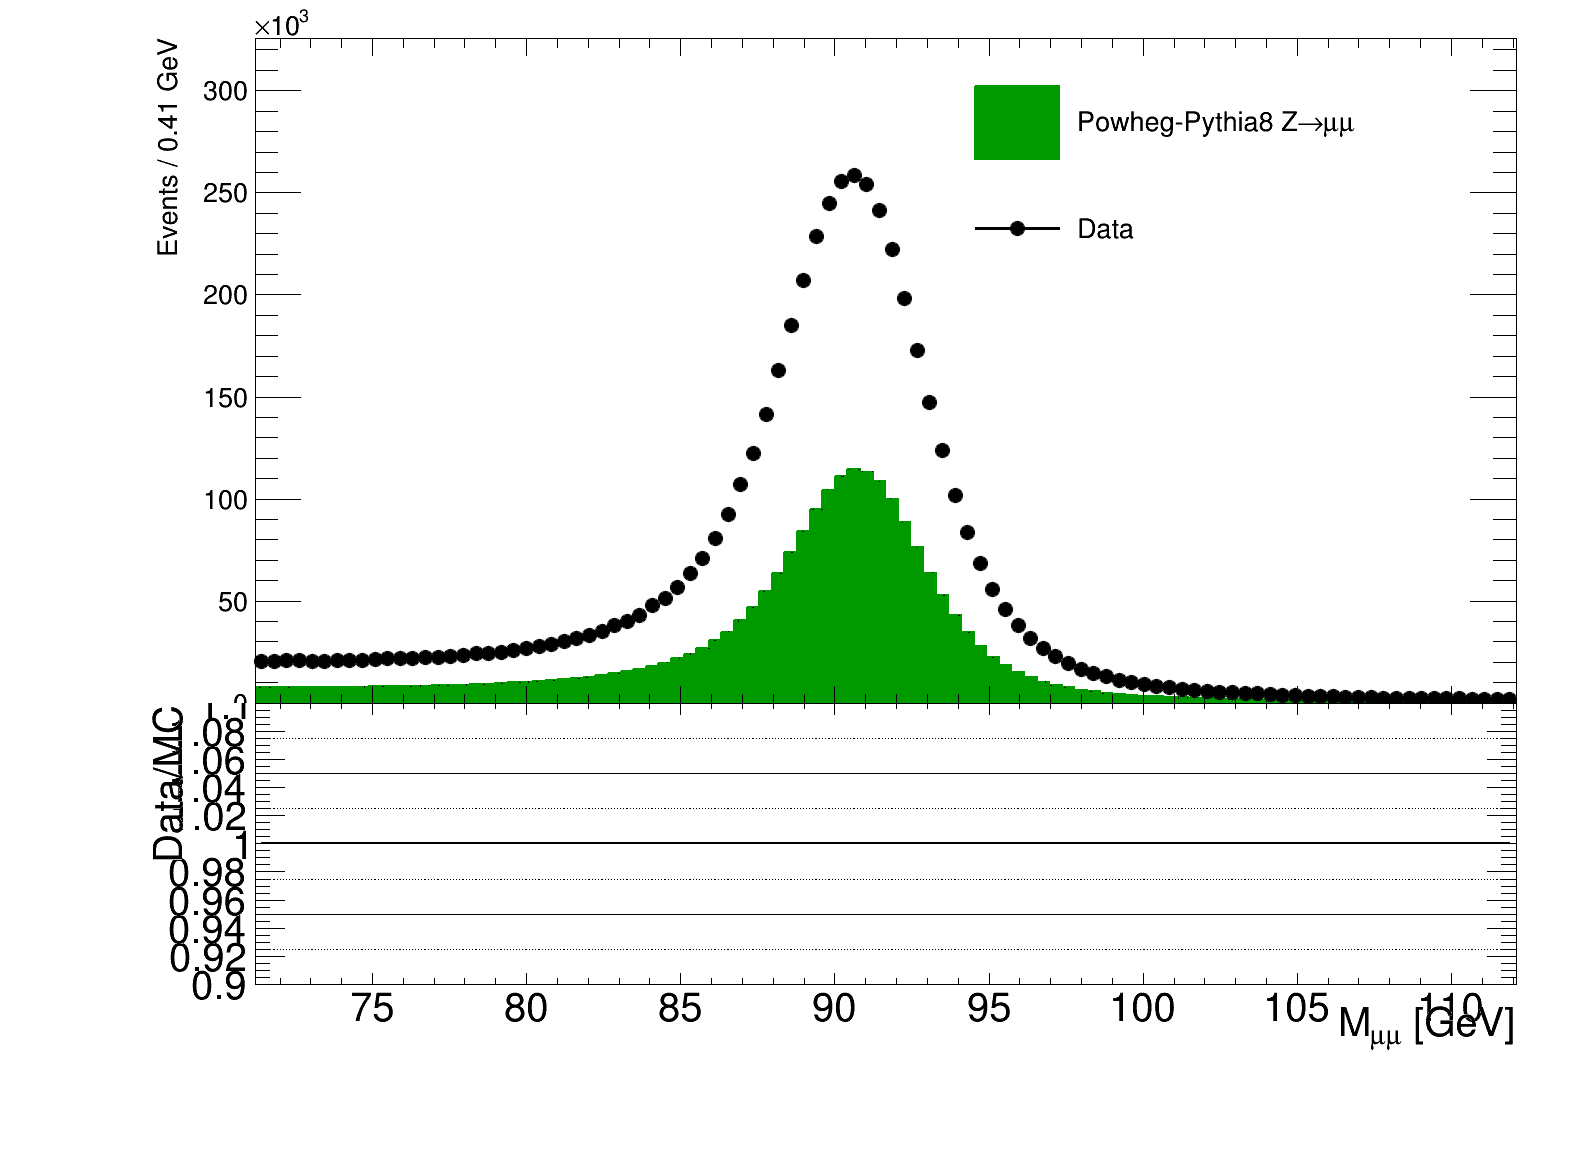

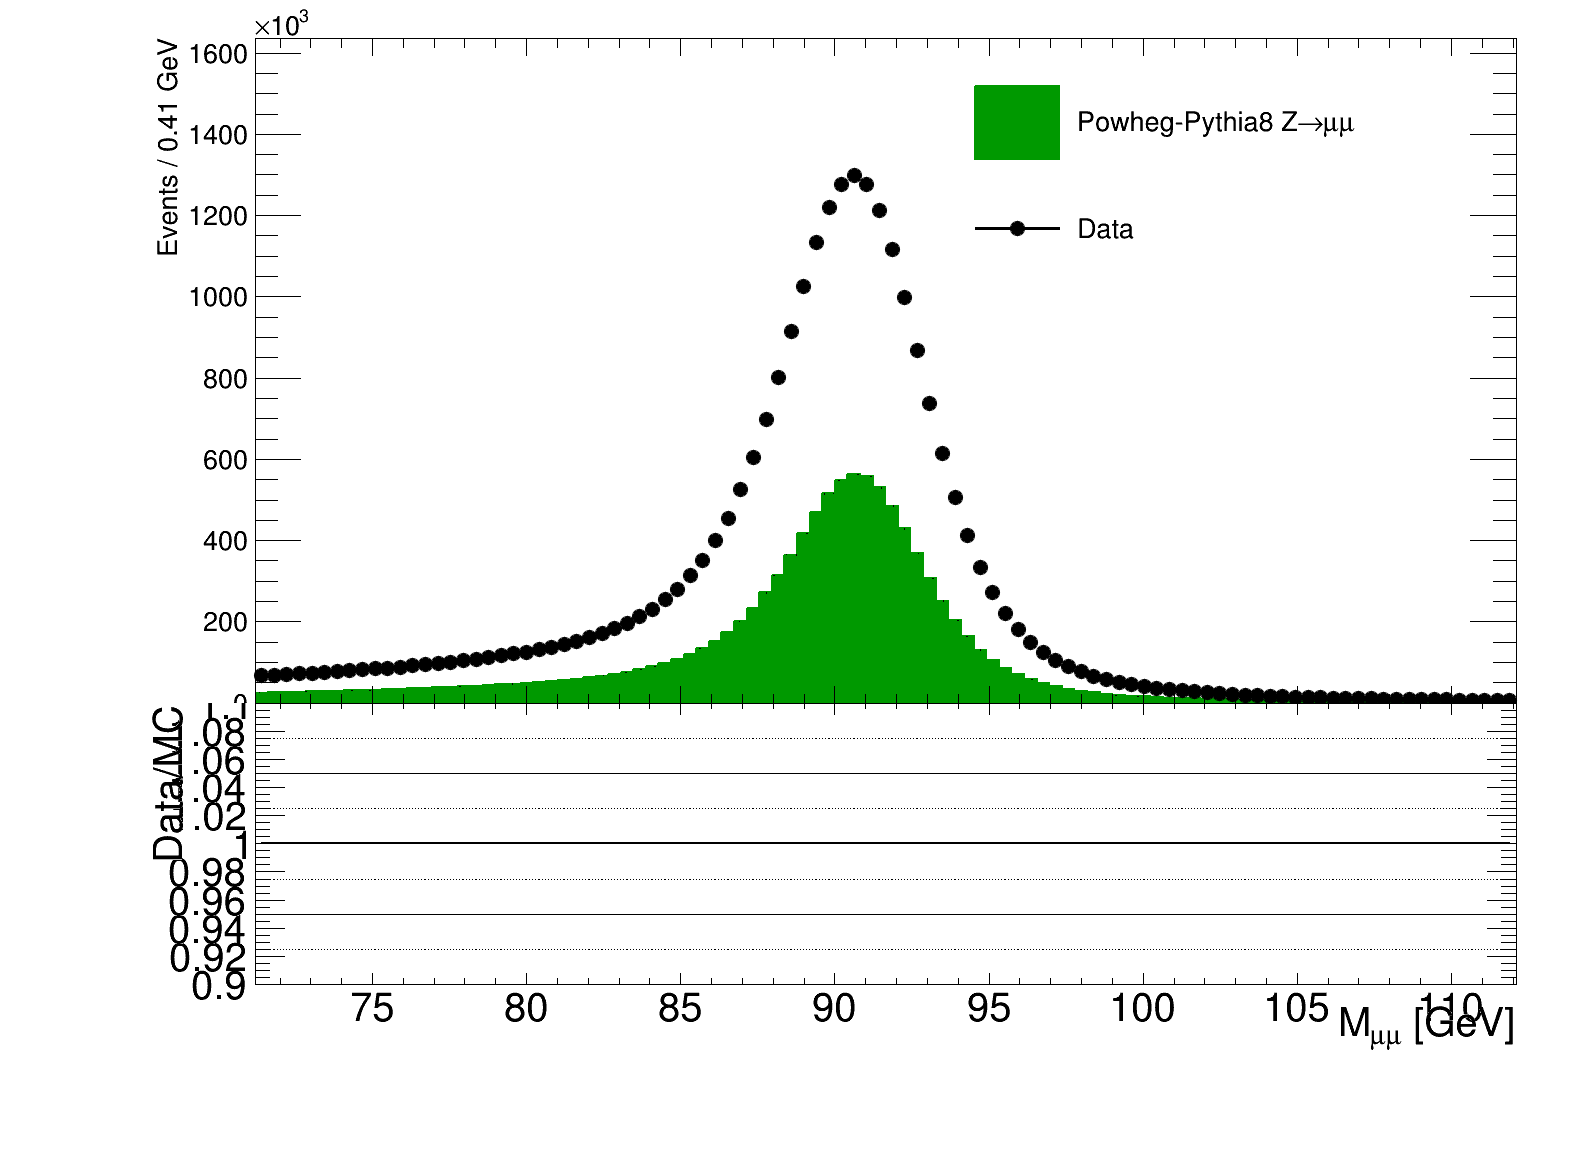

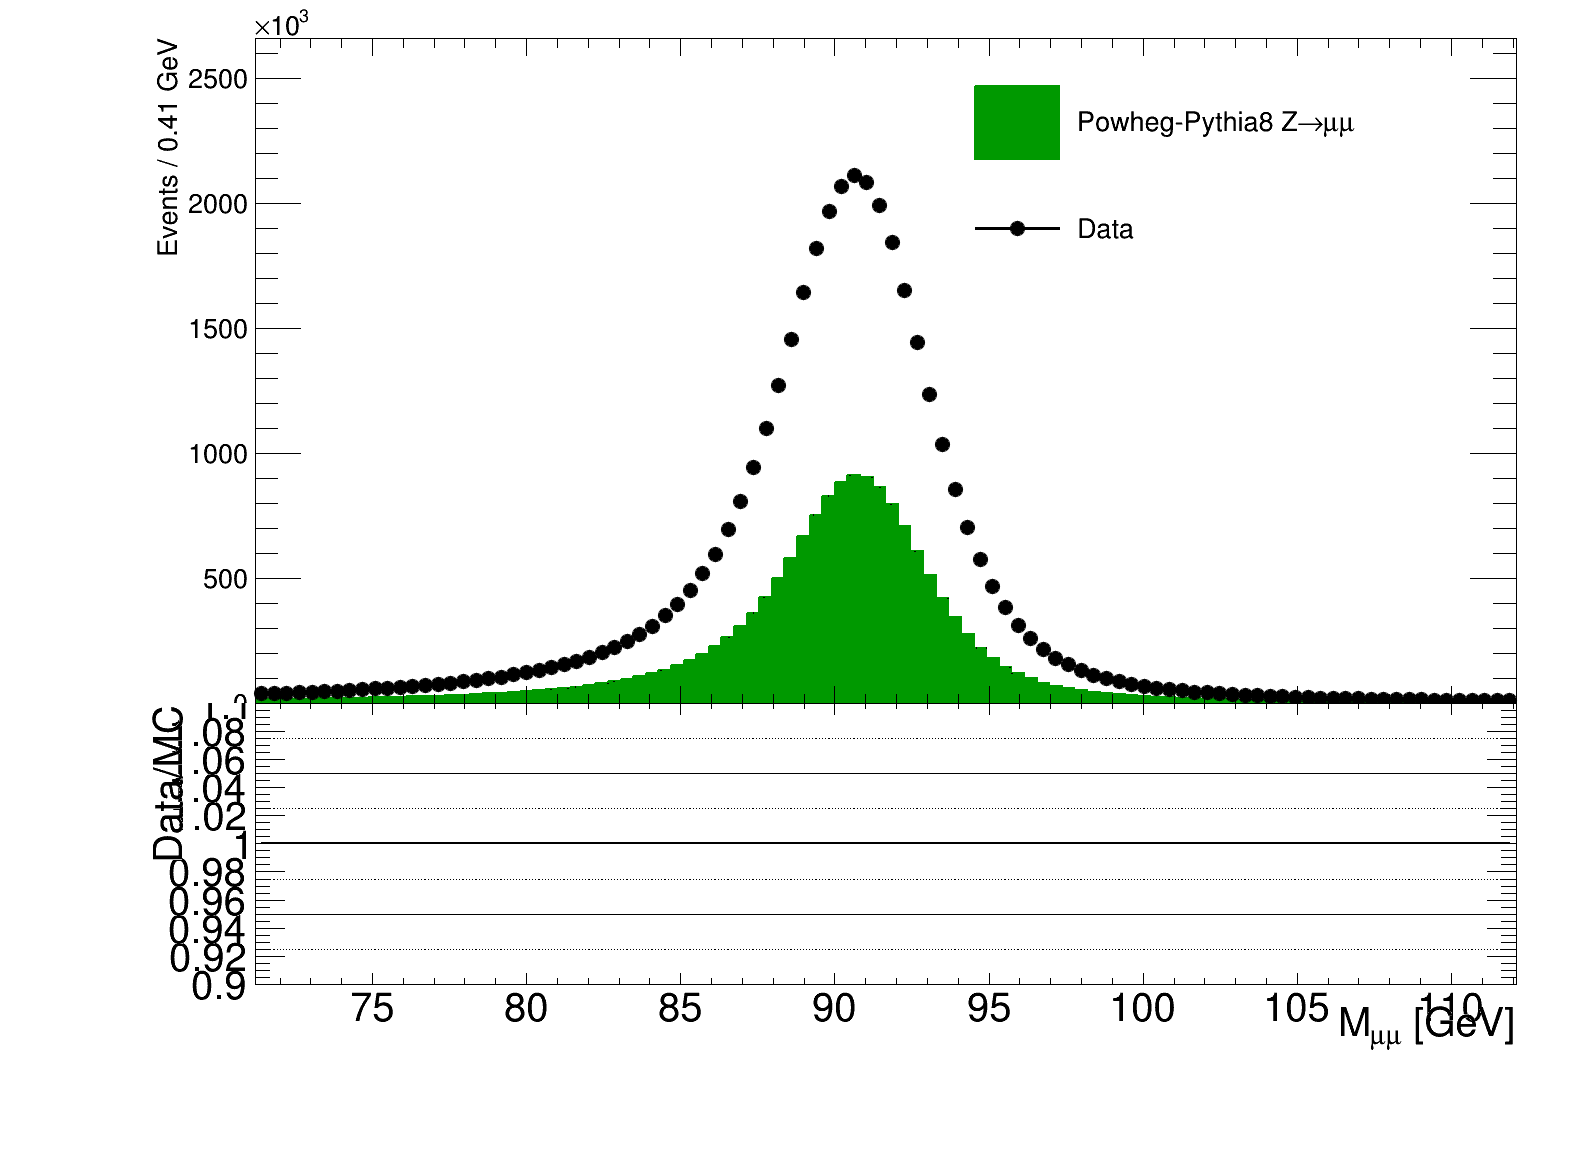

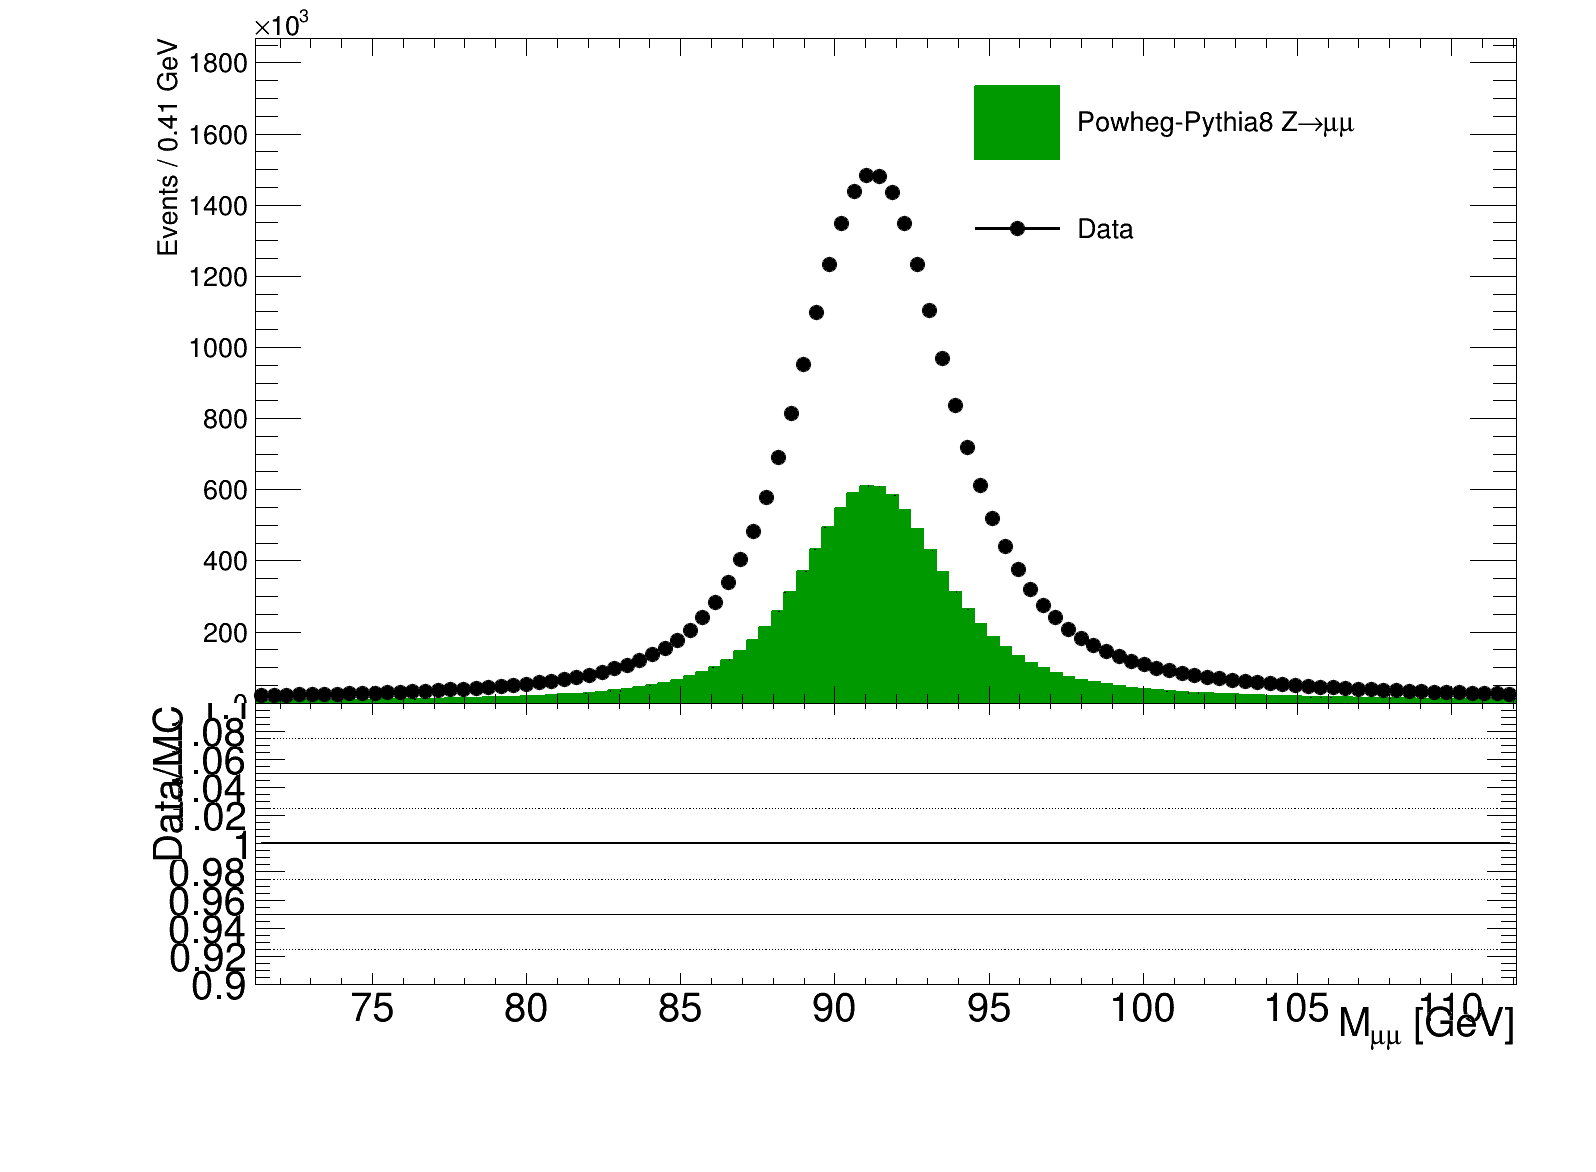

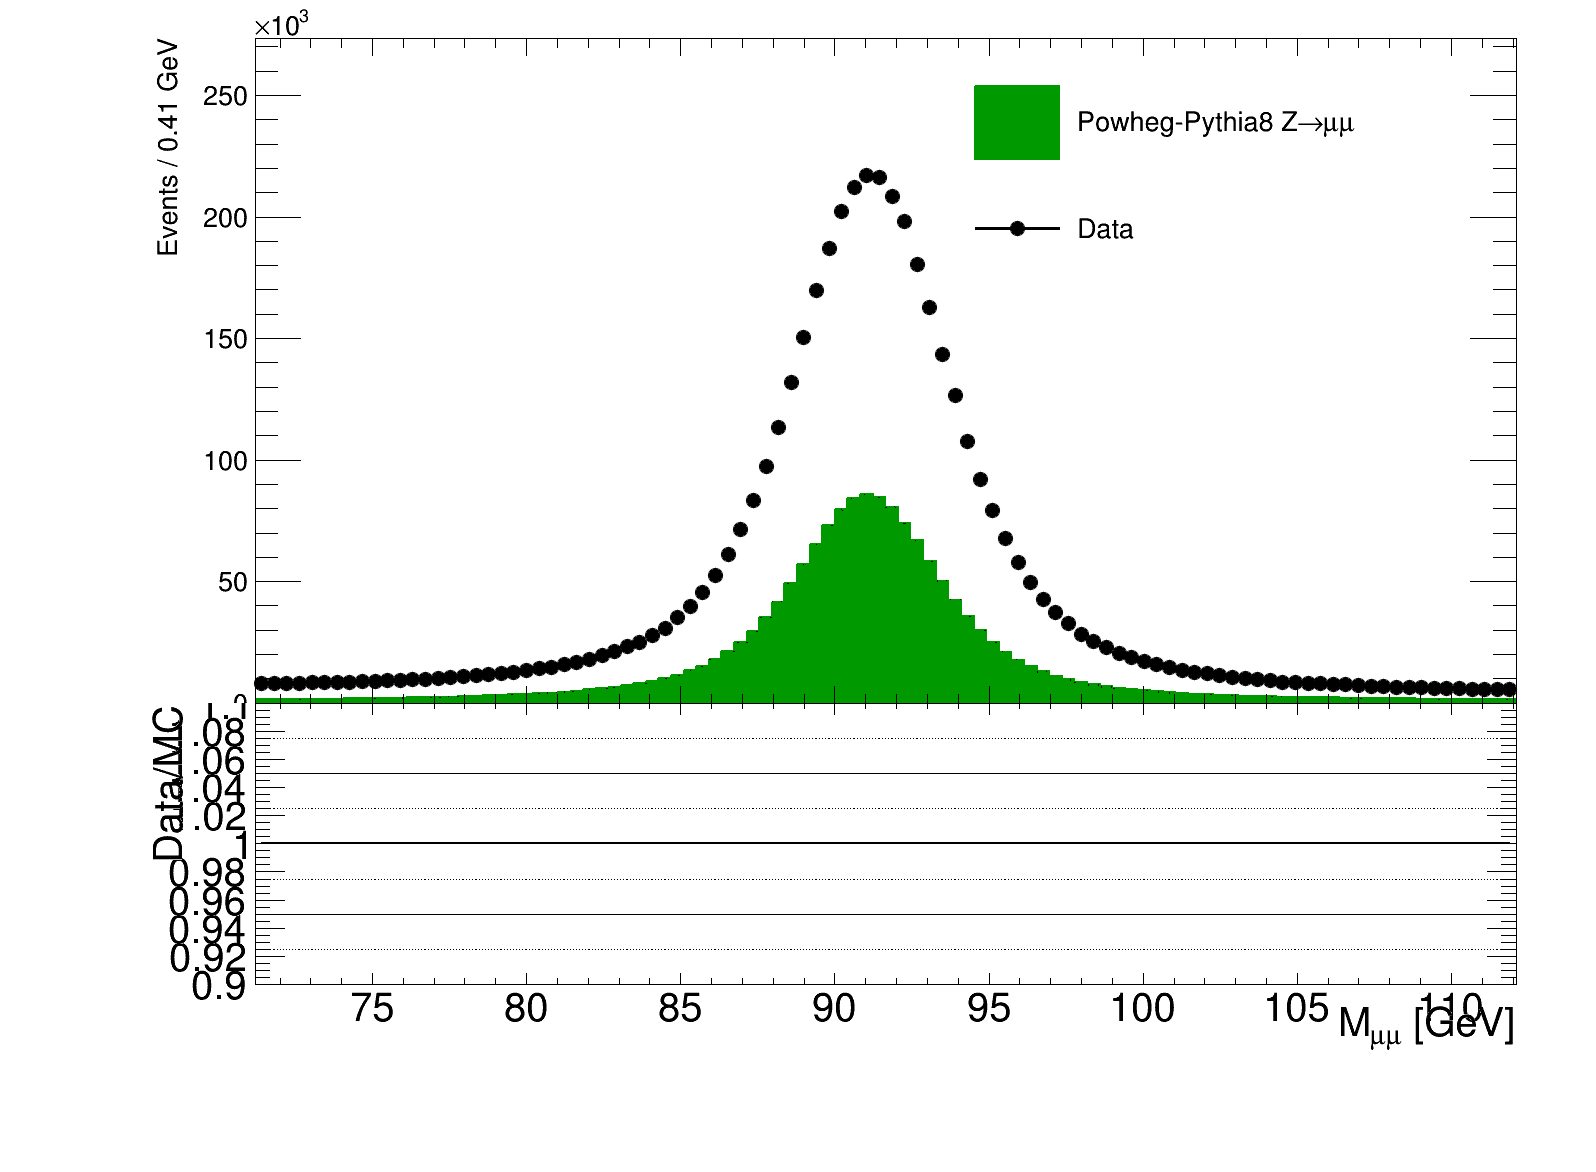

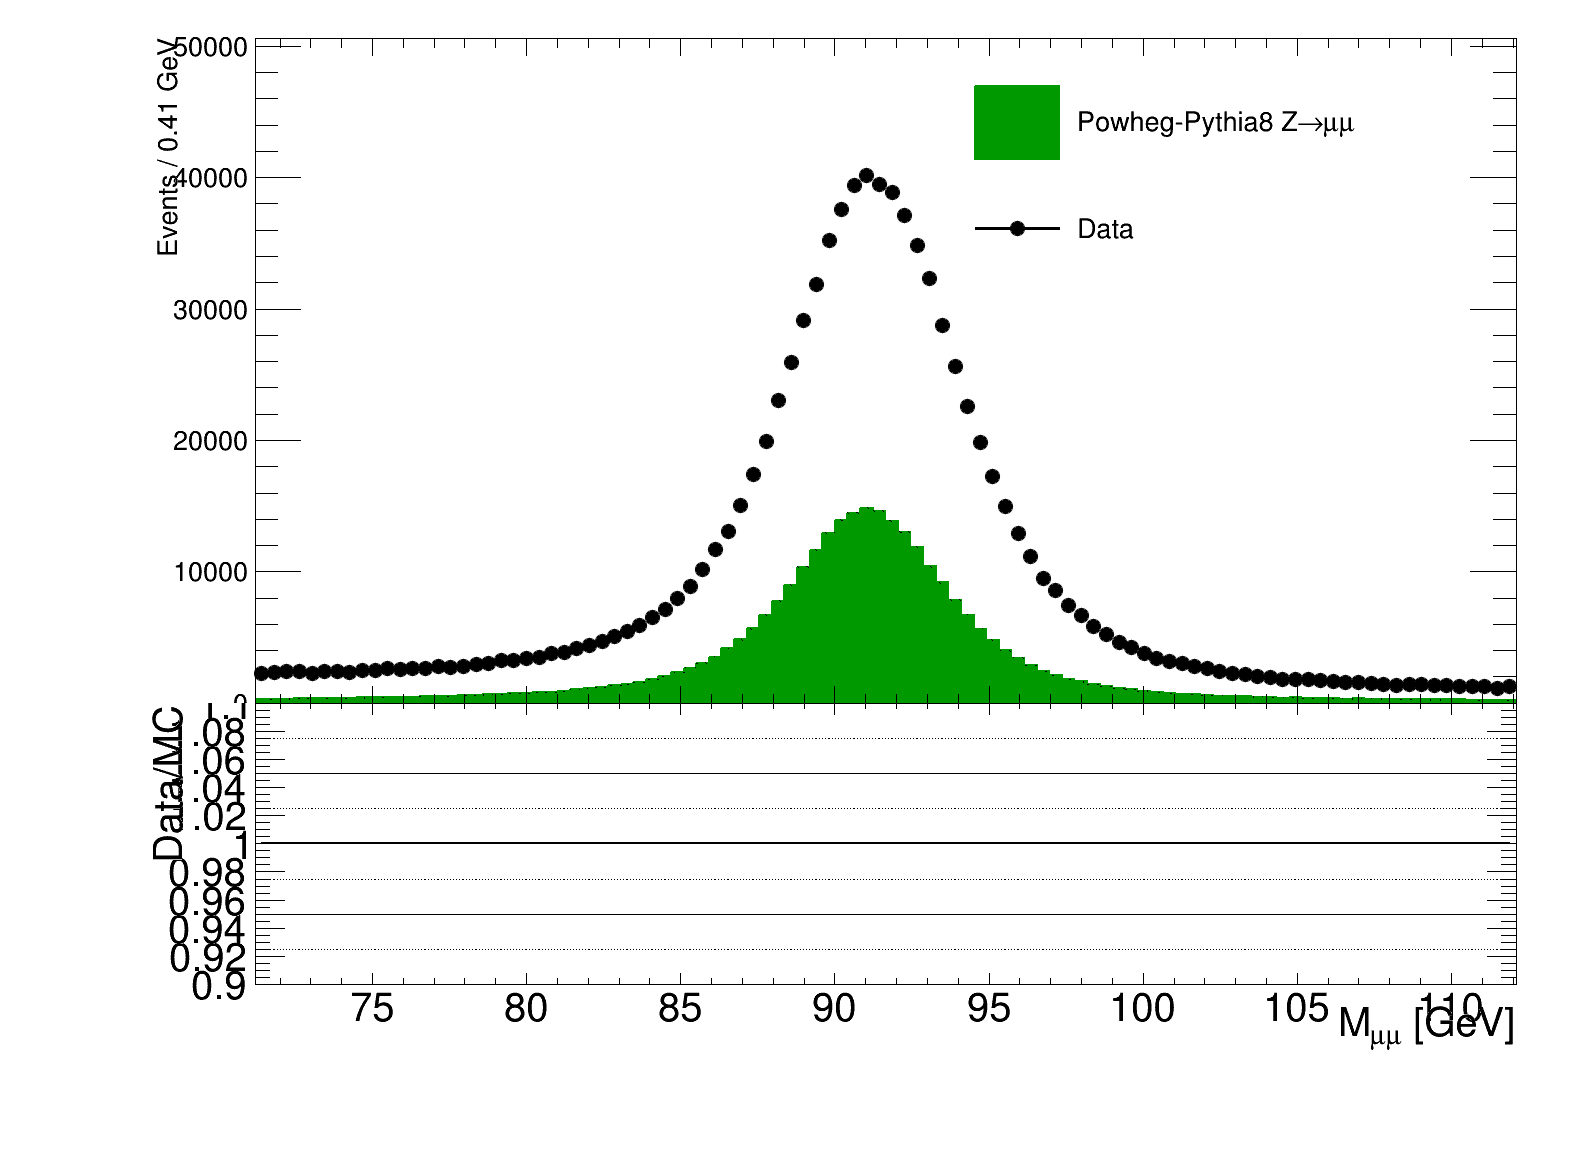

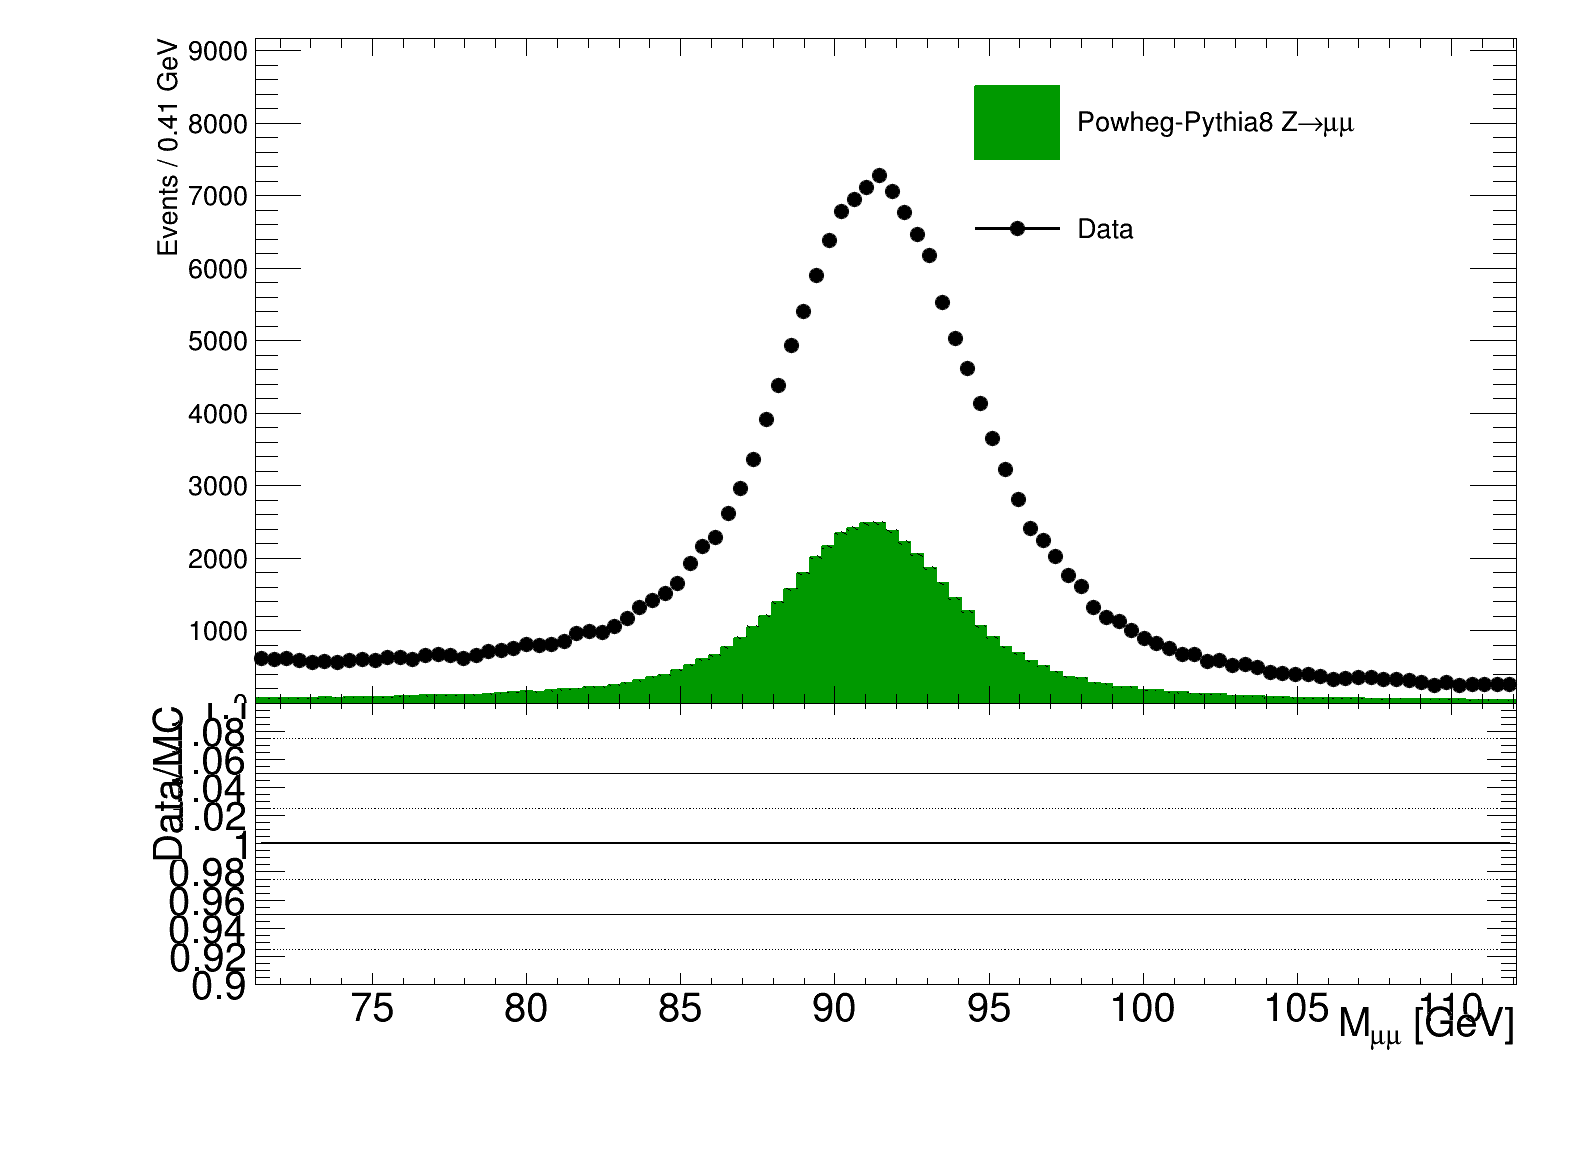

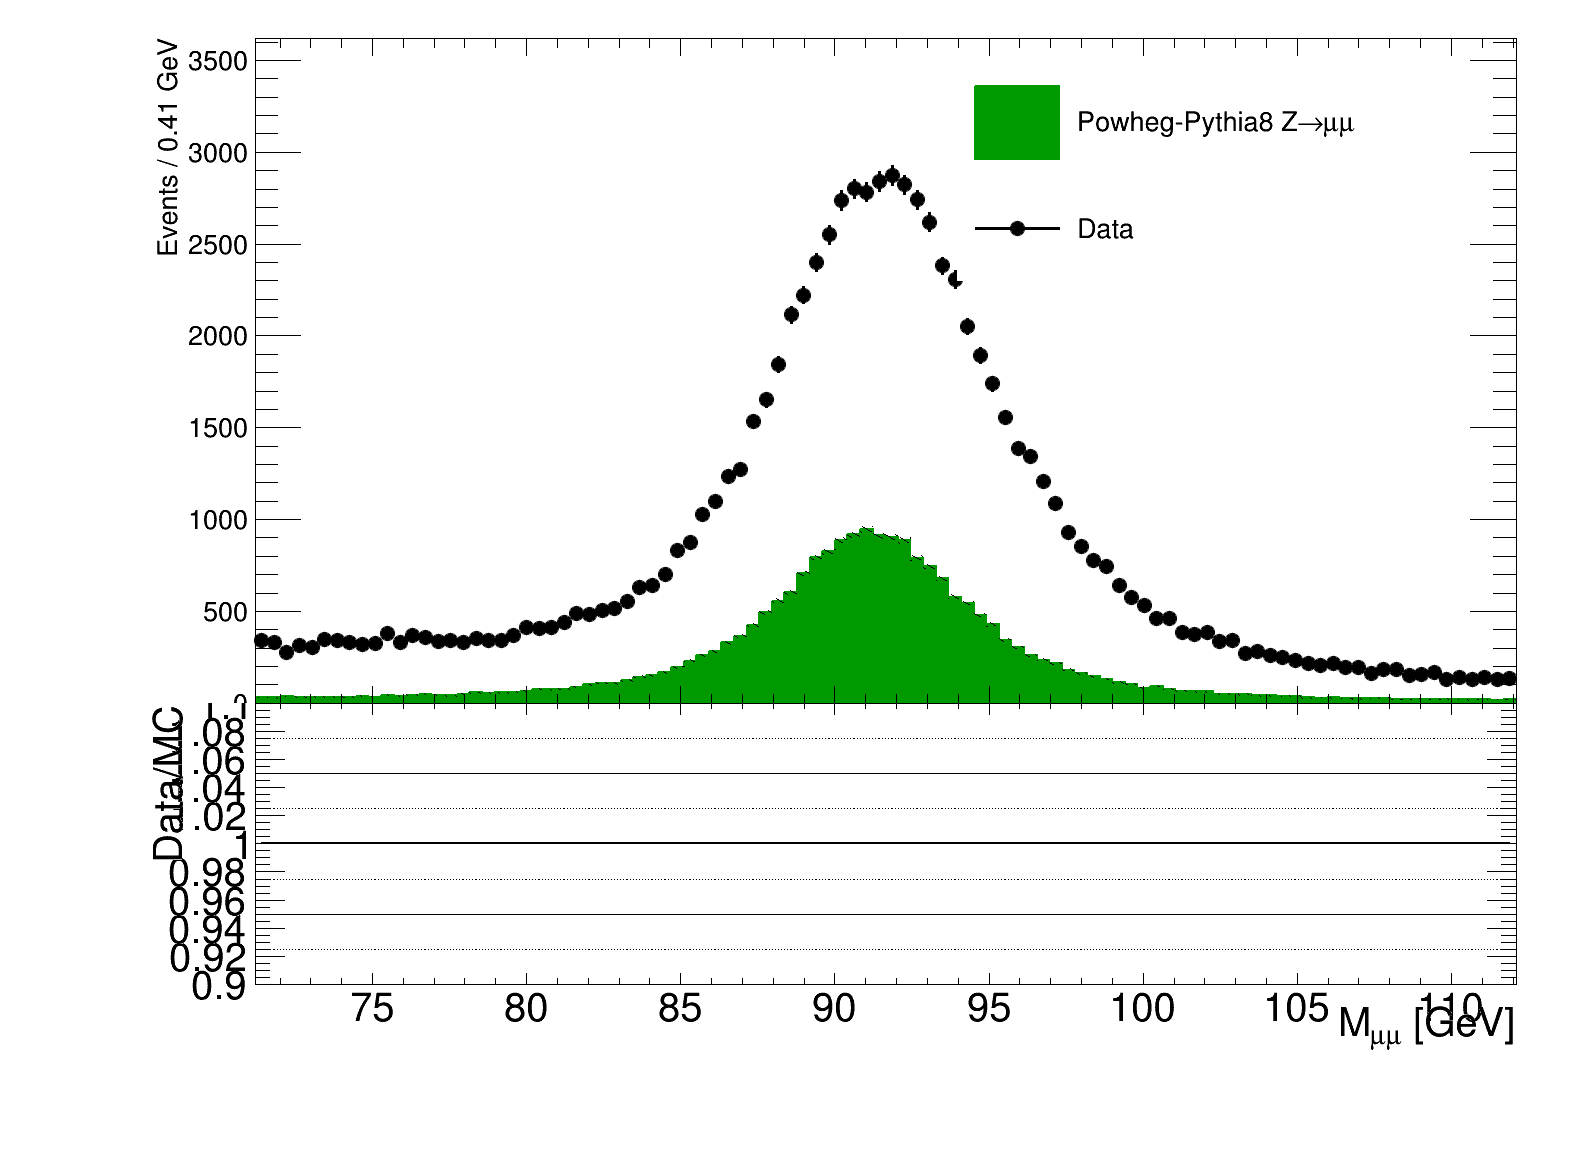

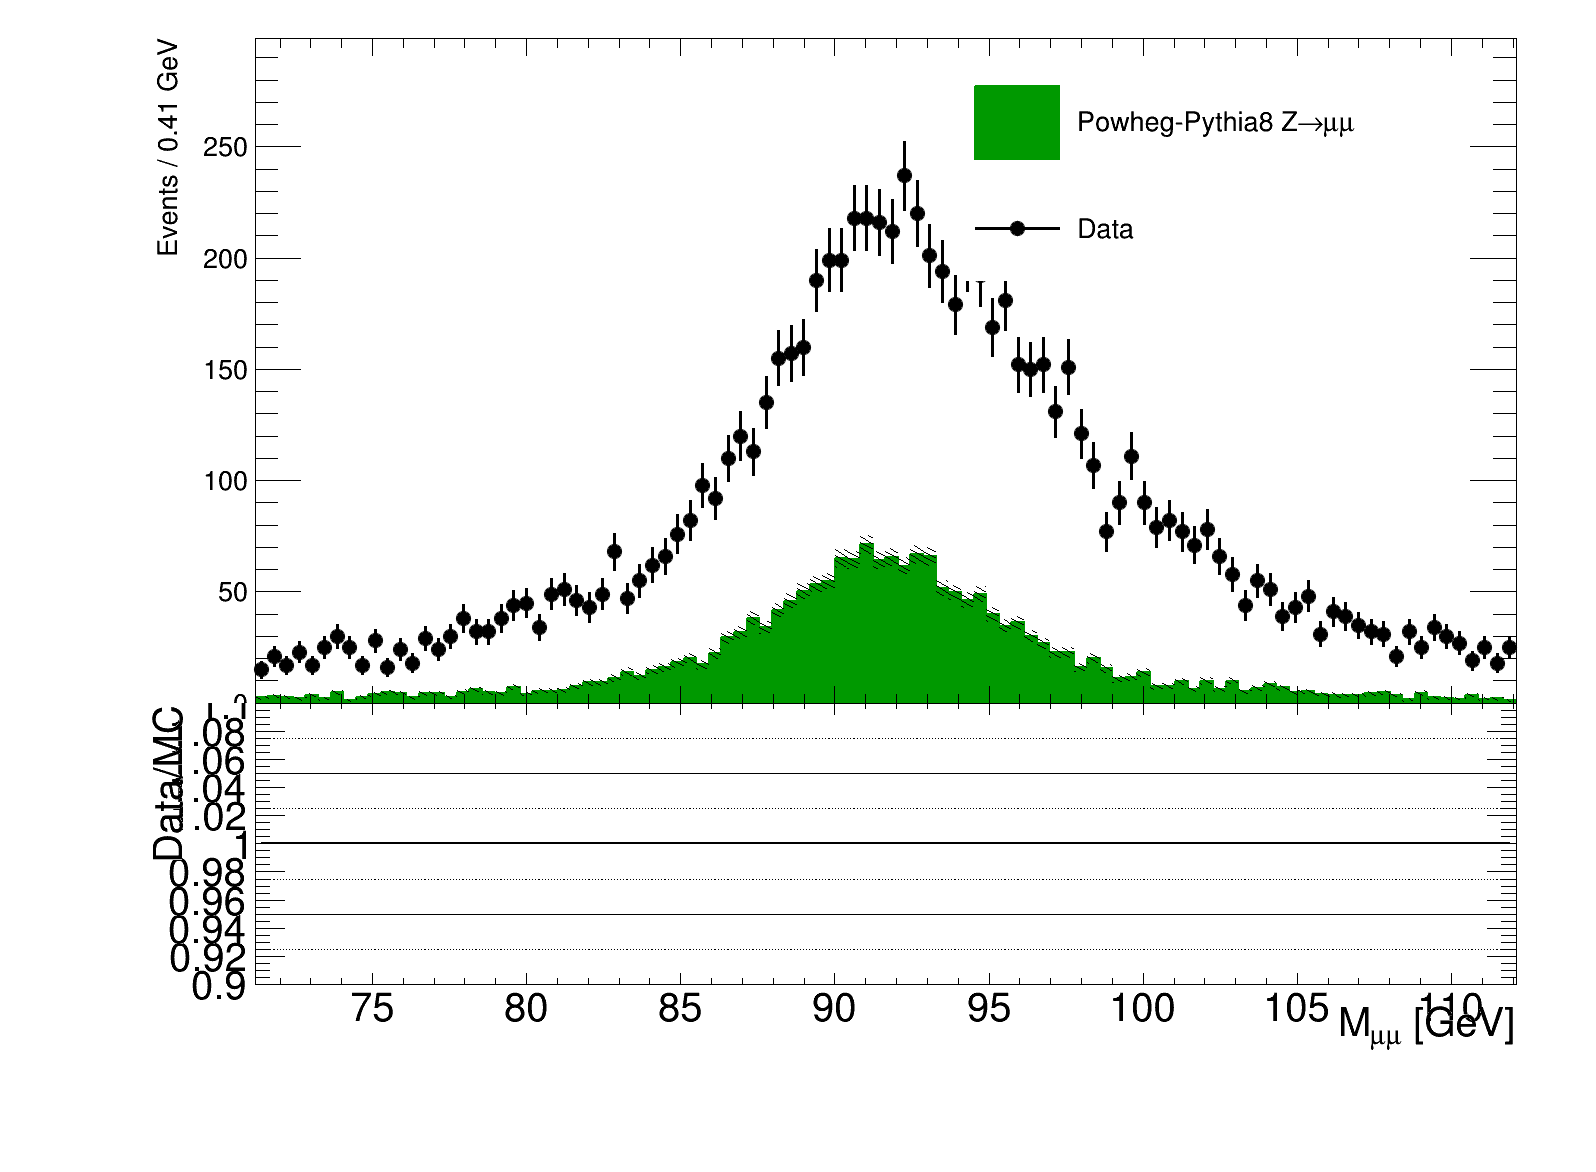

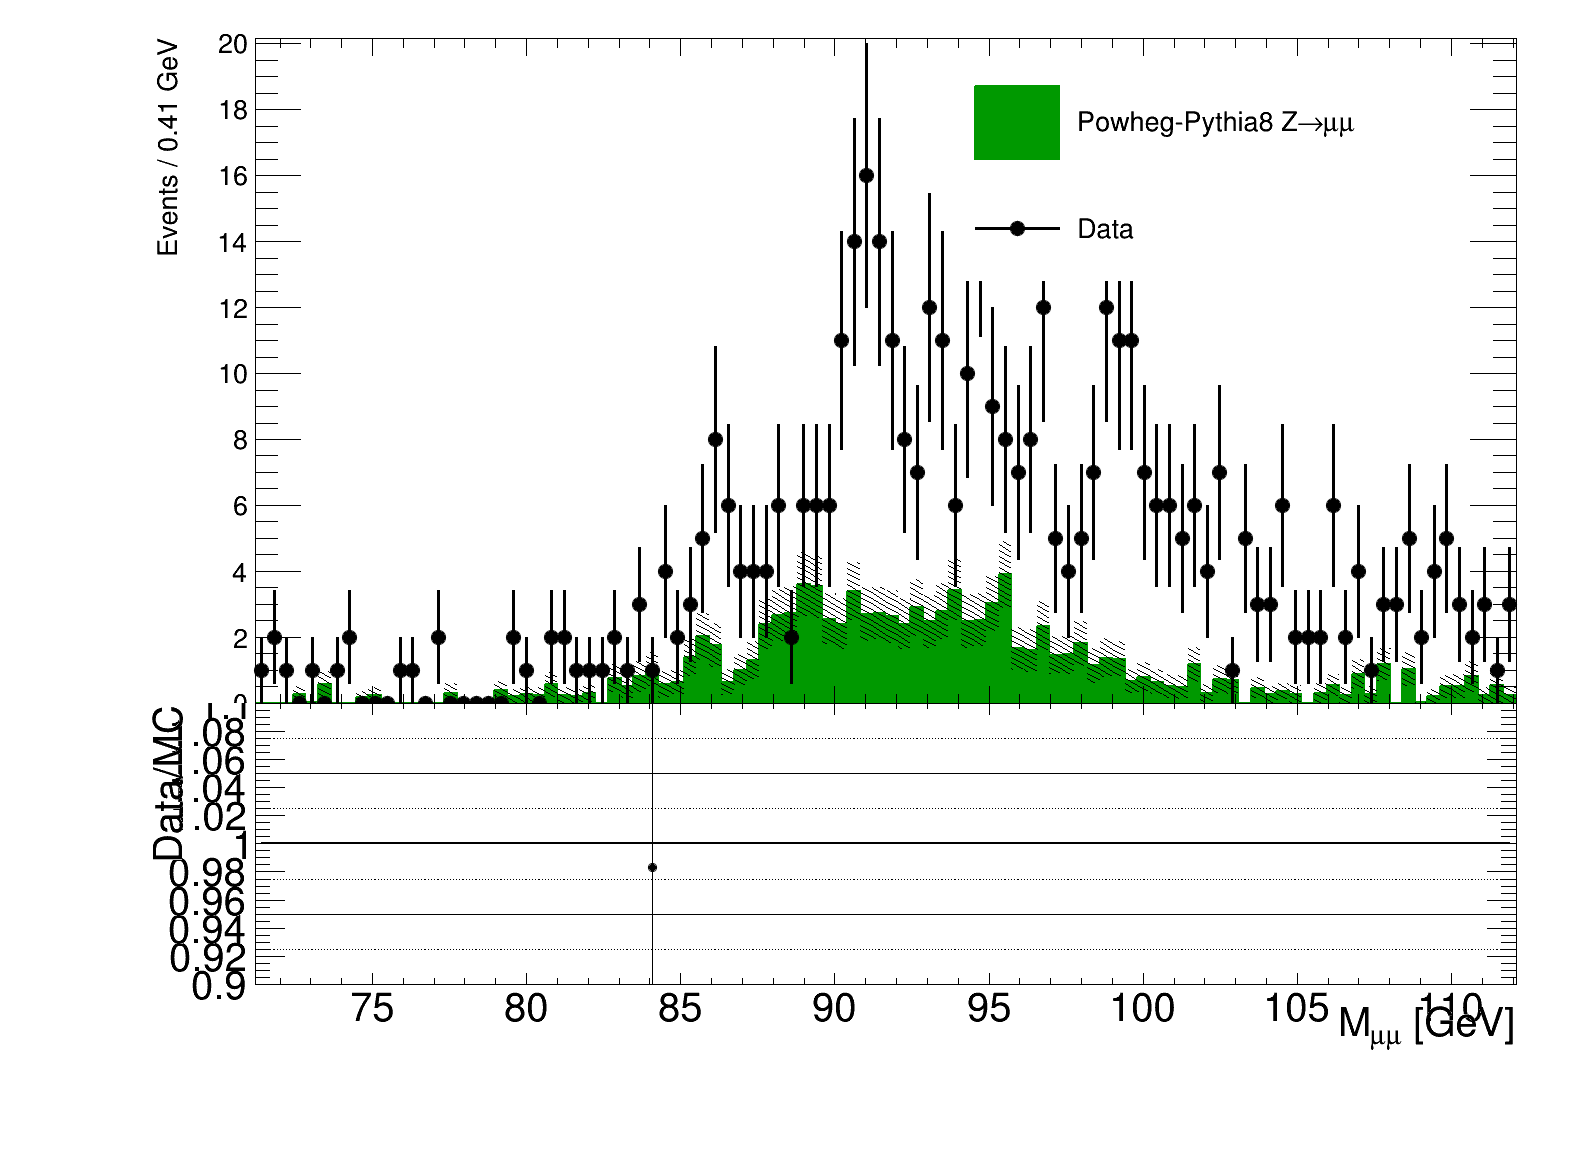

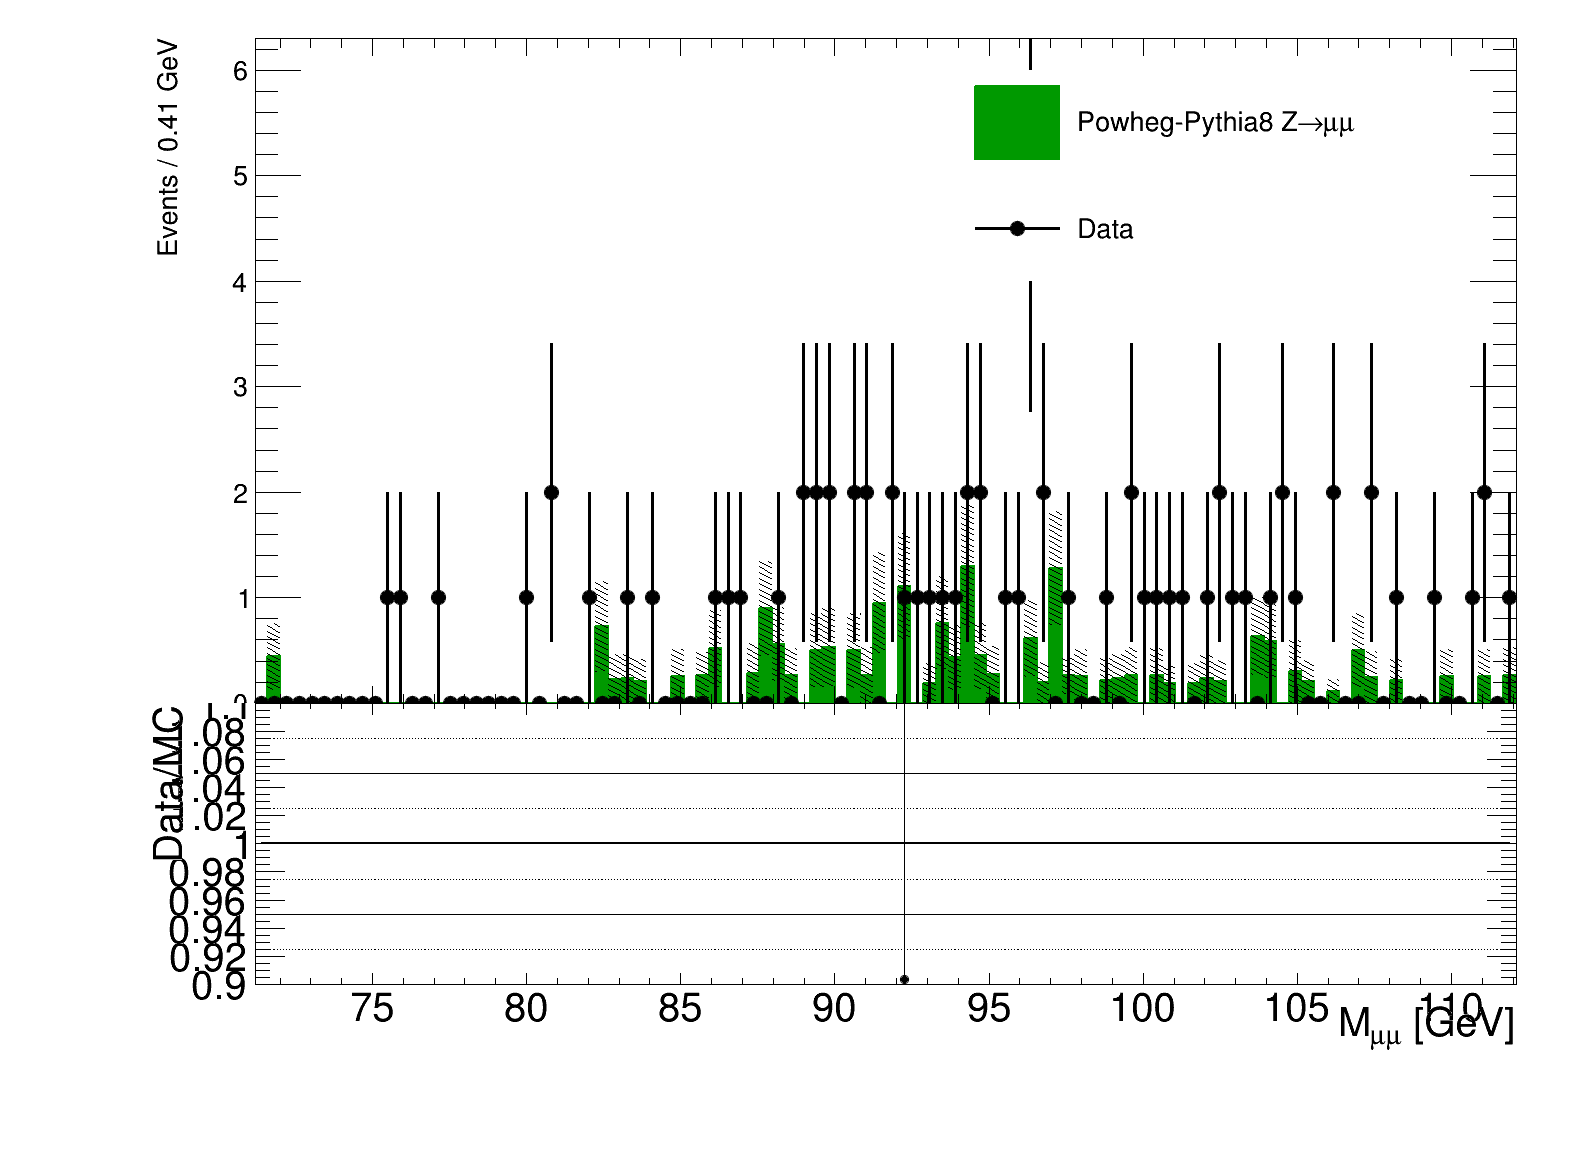

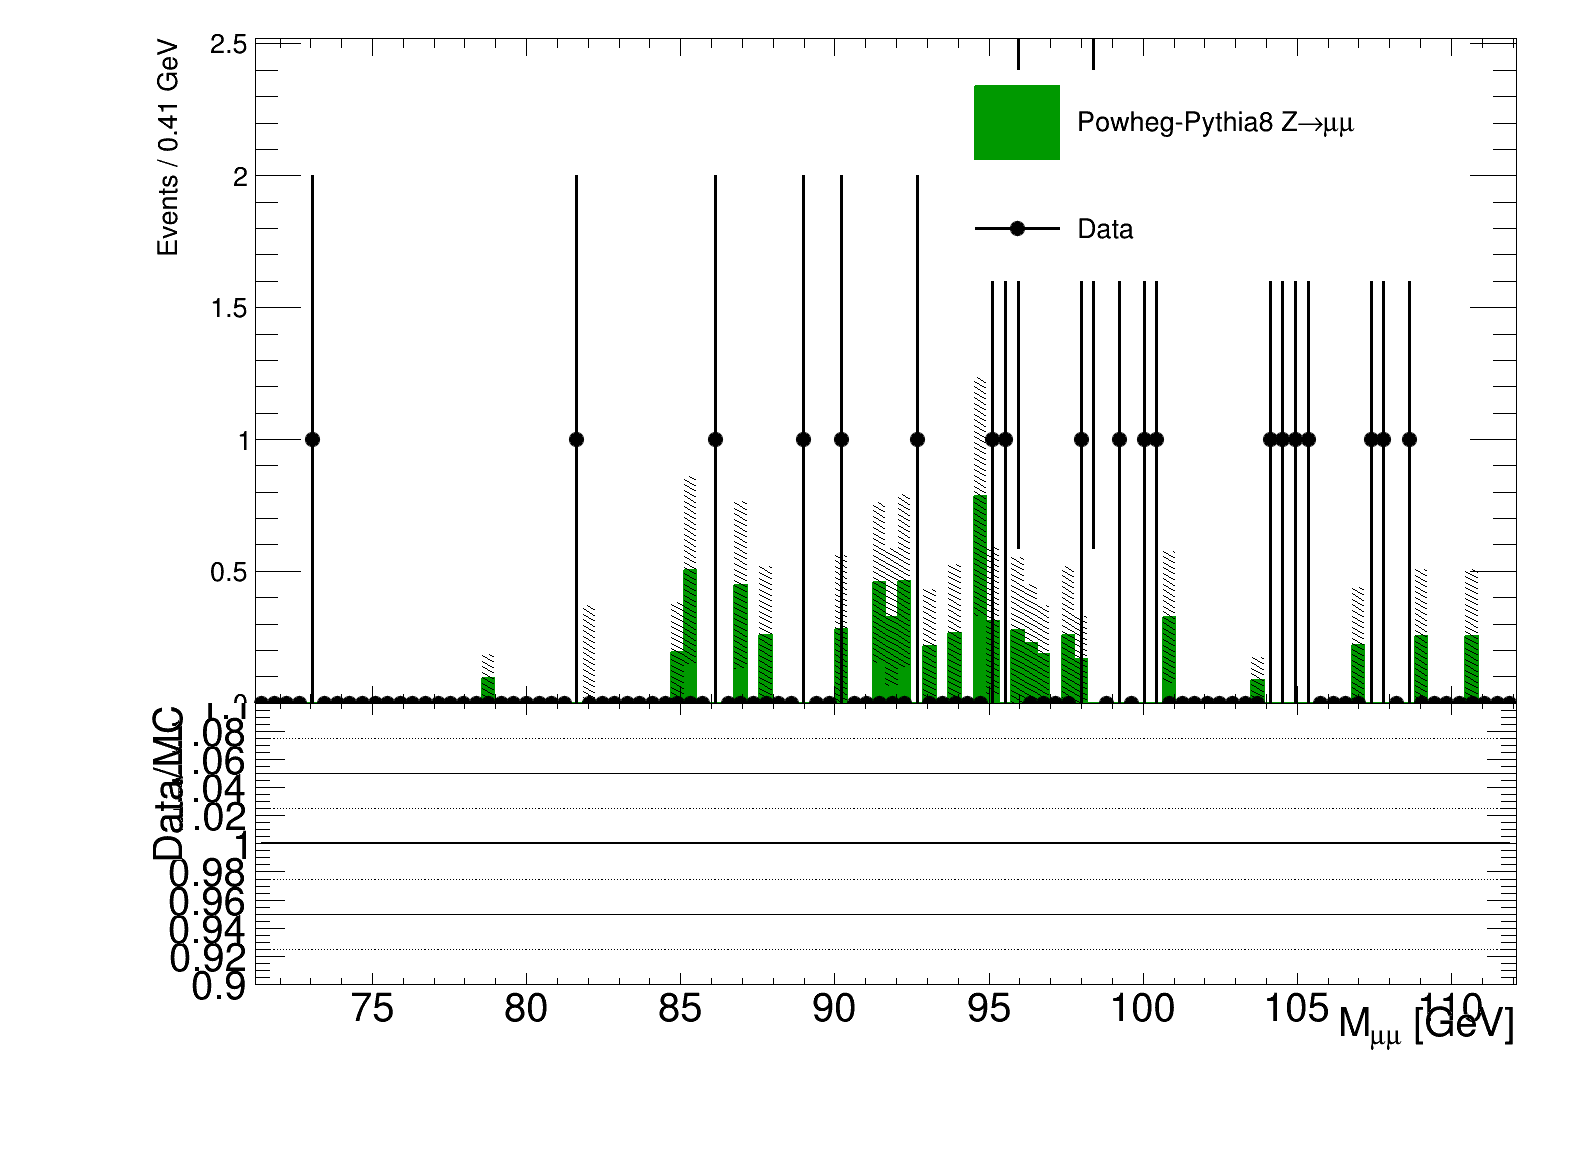

In [5]:
histograms = ["Pos_CB_Mass_Histogram_{}".format(i) for i in range(0, 12)]
from plotting_utils import draw_data_vs_mc
for hname in histograms:
    histograms = hm.get_histograms(hname)
    draw_data_vs_mc(histograms,\
                    ratio_min = 0.9,\
                    ratio_max = 1.1,\
                    colours = {"MC":ROOT.kGreen +2, "Data":ROOT.kBlack},\
                    legend_labels = {"Data":"Data", "MC":"Powheg-Pythia8 Z#rightarrow#mu#mu"},\
                    legend_coordinates = (0.6, 0.6, 0.9, 0.9),\
                    x_axis_label = "M_{#mu#mu} [GeV]",\
                    y_axis_label="Events",\
                    logy=False,\
                    extra_descr="",\
                    to_return = False,\
                    ftype = ".pdf",\
                    plot_dir = "plots",\
                    datakey = "Data")